# Importando os módulos

In [1]:
import json
import pandas as pd
import seaborn as sns
import urllib.request as req
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import date, timedelta


# Carregando os dados

In [2]:
# Endereço do qual se obterá uma resposta no formato JSON. Representa os dados
# gerados (potencia, ecomoniaDia, datas e entre outros) em uma usina solar durante um ano (2019).
url = "http://albertocn.sytes.net/2019-2/pi/projeto/geracao_energia.json"

# Cria uma requisição para a URL passada e define no cabeçalho um browser conhecido como
# cliente (agent) para que o site não proíba o acesso
requisicao = req.Request(url, headers={'User-Agent': 'Mozilla/5.0'})

try:
    # Isto faz com que a URL seja acessada e todo o seu conteúdo seja lido
    # e guardado na variável "dados"
    dados = req.urlopen(requisicao).read().decode()
    dados_proc = json.loads(dados)
except:
    print('deu erro :(')

# Converto a lista dos dados da usina solar para um Dataframe
usina_solar = pd.DataFrame(dados_proc)


# Visualização dos dados

In [3]:
usina_solar.head()


,dia,potencia,energiaDia,economiaDia
0,2019-01-26,"[-1, -1, -1, -1, 0, 0, 0, 0, 131, 127, 168, 19...",29,22.28708
1,2019-08-28,"[-1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 110...",24,18.50328
2,2019-12-05,"[0, 136, 165, 223, 224, 219, 240, 256, 313, 29...",26,20.04522
3,2019-06-13,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...",7,5.39679
4,2019-07-27,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, ...",11,8.48067


In [4]:
usina_solar.tail()


,dia,potencia,energiaDia,economiaDia
360,2019-04-16,"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 117, 141, ...",17,13.10649
361,2019-02-06,"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 128, 174, 19...",7,5.37964
362,2019-04-01,"[-1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 12...",22,16.96134
363,2019-12-26,"[0, 0, 0, 0, 118, 136, 178, 210, 204, 183, 228...",22,16.96134
364,2019-10-07,"[-1, -1, -1, -1, -1, -1, -1, -1, 182, -1, 157,...",28,21.58716


In [5]:
# Verificando os tipos dos dados.
usina_solar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dia          365 non-null    object 
 1   potencia     365 non-null    object 
 2   energiaDia   365 non-null    int64  
 3   economiaDia  365 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.5+ KB


In [6]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(usina_solar.isnull().sum() / usina_solar.shape[0]).sort_values(ascending=False)


dia            0.0
potencia       0.0
energiaDia     0.0
economiaDia    0.0
dtype: float64

Percebe-se que não existe valores ausentes no **Dataframe**. Já identificamos as variáveis do nosso conjunto de dados e seus tipos. No entanto, encontramos um pequeno problema nas colunas que contêm datas. As datas estão em um formato não convencional. Em um tópico posterior chamado 'Formatação dos dados', iremos padronizar as datas para um formato comumente utilizado em um **DataFrame**. Essa padronização é importante para facilitar análises futuras.

# Formatação dos dados

In [7]:
# Converte a coluna 'dia' para o tipo de dado de data com o formato correto
usina_solar['dia'] = pd.to_datetime(usina_solar['dia'], format='%Y-%m-%d')


In [8]:
usina_solar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dia          365 non-null    datetime64[ns]
 1   potencia     365 non-null    object        
 2   energiaDia   365 non-null    int64         
 3   economiaDia  365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 11.5+ KB


Foi observado que a coluna **dia** inicialmente possuía um tipo de dado **object**, no entanto, após a conversão das datas para um formato convencional, o tipo de dado da coluna foi alterado para **datetime64[ns]**.


In [9]:
print(f'dia\nMenor data: {usina_solar["dia"].min()}\nMaior data: ' \
        f'{usina_solar["dia"].max()}\n')


dia
Menor data: 2019-01-01 00:00:00
Maior data: 2019-12-31 00:00:00



# Resumo estatístico

In [10]:
# Variáveis numéricas
usina_solar.describe()


,energiaDia,economiaDia
count,365.00000,365.000000
mean,22.80000,17.563658
std,6.14218,4.726236
min,0.00000,0.000000
25%,20.00000,15.419400
50%,24.00000,18.503280
75%,28.00000,21.518560
max,31.00000,23.900070


In [11]:
# Variáveis categóricas
usina_solar.describe(include=['O'])


,potencia
count,365
unique,359
top,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
freq,7


Ao analisar os resumos estatísticos, é perceptível que, na análise da(s) variável(is), pode-se obter a **impressão equivocada de que estamos lidando com uma variável categórica**. No entanto, isso não é o caso, uma vez que a coluna **potencia** contém listas com diversos valores de potência para cada dia. Isso faz com que o **DataFrame** seja interpretado erroneamente como uma variável categórica.

# Análise exploratória de dados

Começaremos a nossa análise verificando a distribuição da nossa variável alvo **energiaDia**.

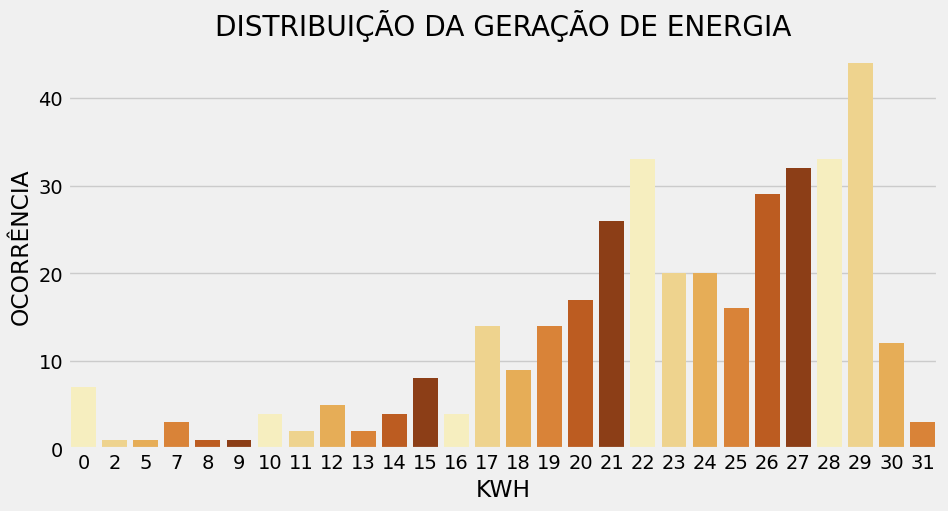

In [12]:
cores = sns.color_palette("YlOrBr")
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
sns.countplot(data=usina_solar, x='energiaDia', palette=cores)
plt.xlabel('KWH')
plt.ylabel('OCORRÊNCIA')
plt.title('DISTRIBUIÇÃO DA GERAÇÃO DE ENERGIA')
plt.show()


Até o momento a única informação que temos é que 29 kwh teve uma maior concentração.

* Energia gerada anual

In [13]:
# Função criada com o objetivo em ordenar os dados contidos em uma variável
def ordenar(dados):
    return [ordenando for ordenando in sorted(dados)]


# Função em que retornará os valores de energia (kwh) gerados em n dias ao longo de um ano
def valores_kwh(dados):
    return [kwh for data, kwh in ordenar(dados)]


# Função em que será chamada em "def apresentar_grafico_linha(informacoes)", ou seja, passará os
# dados das coordenadas de entrada para o gráfico
def filtrar_entrada(informacoes):
    x = []
    y = []
    for dia in range(len(valores_kwh(informacoes))):
        y.append(valores_kwh(informacoes)[dia])
        x.append(dia + 1)
        # Retorno da função com os dados preenchidos com os eixos x e y
    return x, y


# Função de geração de gráfico usando a biblioteca matplotlib
def gerar_grafico(x, y, titulo, xlabell):
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='orange')
    plt.title(titulo, color='black')
    plt.xlabel(xlabell, color='black')
    plt.ylabel('ENERGIA GERADA POR DIA (kwh)', color='black')
    plt.grid(True, alpha=.4)
    plt.xticks()
    plt.yticks()
    plt.legend(['kwh'], bbox_to_anchor=(1.12, 0.5), loc=5, borderaxespad=0.)
    plt.show()


# Função que será responsável por gerar o gráfico
def apresentar_grafico_linha(informacoes, titulo, xlabell):
    tupla_dados = filtrar_entrada(informacoes)
    gerar_grafico(tupla_dados[0], tupla_dados[1], titulo, xlabell)


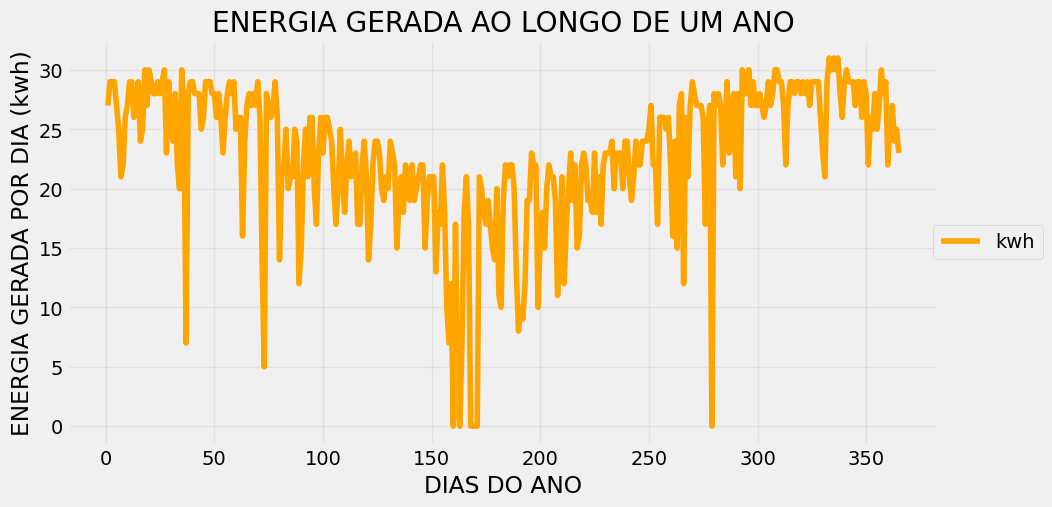

In [14]:
# Gráfico de linha

# Converte as datas para um formato usual nos gráficos e armazena em uma lista
dias = [data.strftime('%Y-%m-%d') for data in usina_solar['dia'].tolist()]
# Obtém todos os valores de kwh gerados em dias diferentes e armazena em uma lista
kwhs = usina_solar['energiaDia'].tolist()
# Uma lista de tuplas com os dias e kwhs
dados_usina = [(dias[indice], kwhs[indice]) for indice, dia in enumerate(dias)]

titulo = 'ENERGIA GERADA AO LONGO DE UM ANO'
xlabell = 'DIAS DO ANO'

apresentar_grafico_linha(dados_usina, titulo, xlabell)


In [15]:
# Cria uma nova coluna 'mes' para armazenar o mês de cada data
usina_solar['mes'] = usina_solar['dia'].dt.month

# Agrupa os dados por mês e soma a energia diária
dados_agrupados_mes = usina_solar.groupby('mes')['energiaDia'].sum()


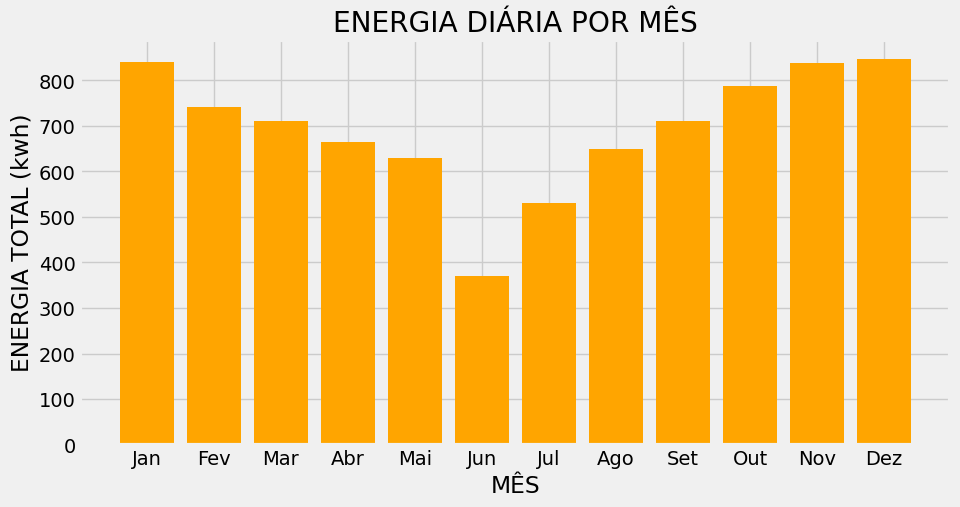

In [16]:
# Gráfico de barras
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.figure(figsize=(10, 5))
plt.bar(nomes_meses, dados_agrupados_mes, color='orange')
plt.xlabel('MÊS')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR MÊS')
plt.show()


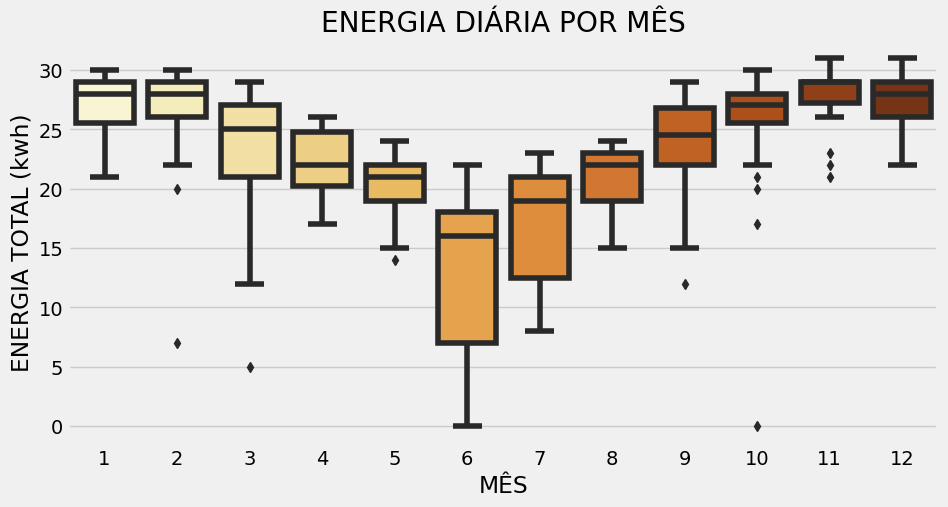

In [17]:
# Gráfico de boxplot
nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
cores = sns.color_palette("YlOrBr", n_colors=len(nomes_meses))
plt.figure(figsize=(10, 5))
sns.boxplot(x='mes', y='energiaDia', data=usina_solar, palette=cores)
plt.xlabel('MÊS')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR MÊS')
plt.show()


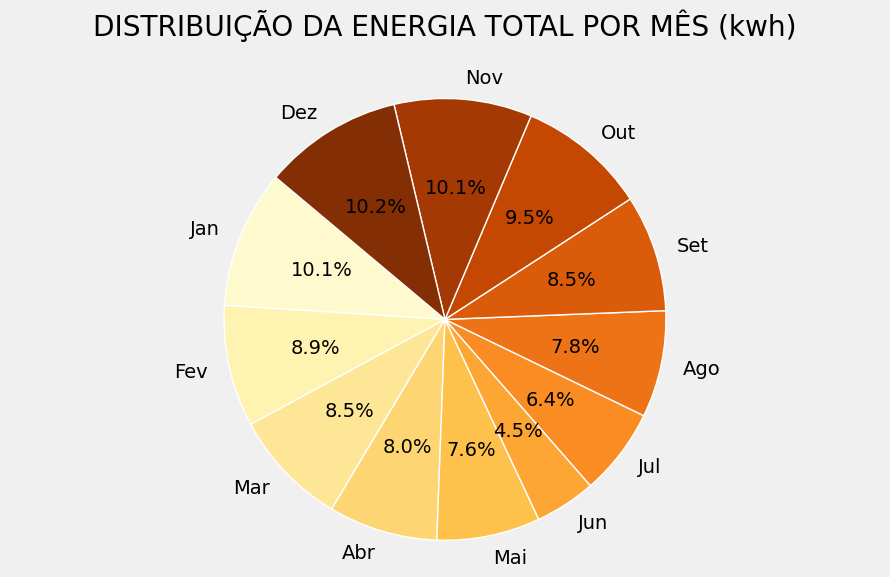

In [18]:
# Gráfico de pizza
cores = sns.color_palette('YlOrBr', n_colors=len(nomes_meses))
plt.figure(figsize=(10, 6))
plt.pie(dados_agrupados_mes, labels=nomes_meses, autopct='%1.1f%%', startangle=140,
        colors=cores, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('DISTRIBUIÇÃO DA ENERGIA TOTAL POR MÊS (kwh)\n')
plt.axis('equal')
plt.show()


In [19]:
dados_agrupados_mes.sort_values()


mes
6     371
7     531
5     630
8     650
4     664
3     711
9     711
2     741
10    787
11    839
1     840
12    847
Name: energiaDia, dtype: int64

Ao analisar os gráficos anuais, é evidente que a conclusão pode ser obtida de que o mês com a maior geração de energia foi dezembro, enquanto o mês com a menor geração foi junho. Isso se deve ao fato de que dezembro corresponde ao período de verão, enquanto junho representa o inverno.

* Energia gerada trimestral

In [20]:
# Cria uma nova coluna com o trimestre
usina_solar['trimestre'] = usina_solar['dia'].dt.to_period('Q')

# Cria um dicionário de mapeamento para os trimestres
mapeamento_trimestres = {}
for trimestre in usina_solar['trimestre'].unique():
    trimestre = str(trimestre)
    mapeamento_trimestres[trimestre] = f'{trimestre[::-1][0]}º TRI'

# Usa a função replace para renomear os valores na coluna 'trimestre'
usina_solar['trimestre'] = usina_solar['trimestre'].replace(mapeamento_trimestres)

# Agrupa os dados por trimestre e soma a energia diária
dados_agrupados_trimestre = usina_solar.groupby('trimestre')['energiaDia'].sum()

nomes_trimestres = sorted(list(mapeamento_trimestres.values()))


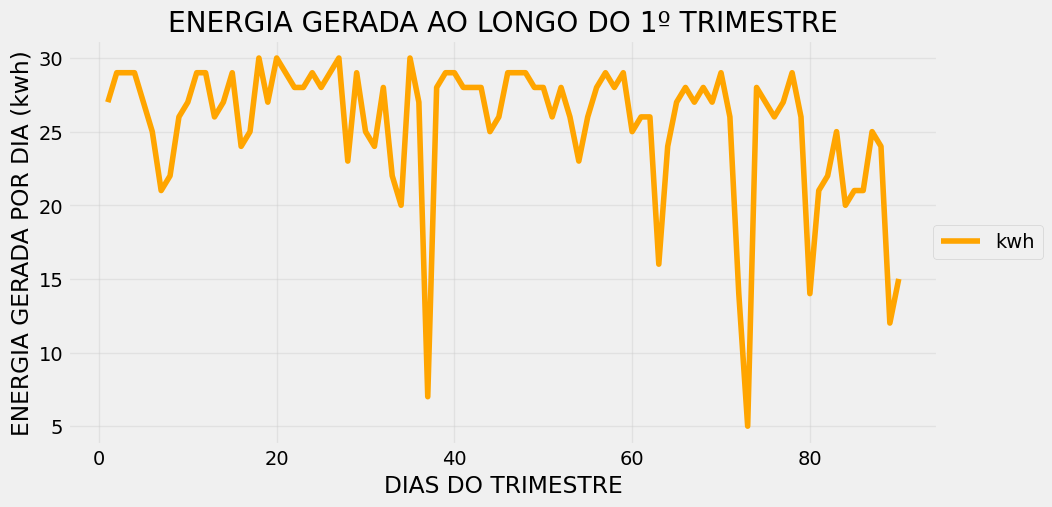

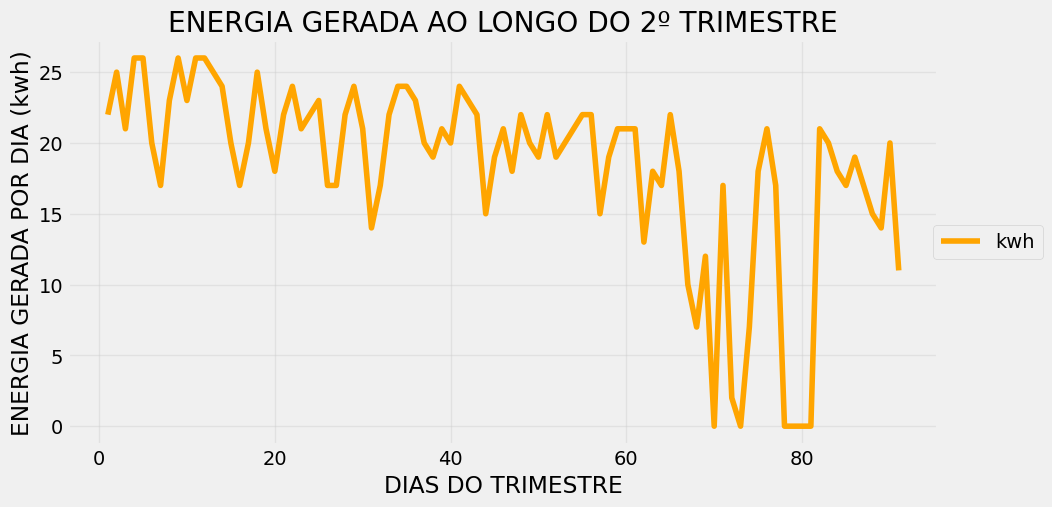

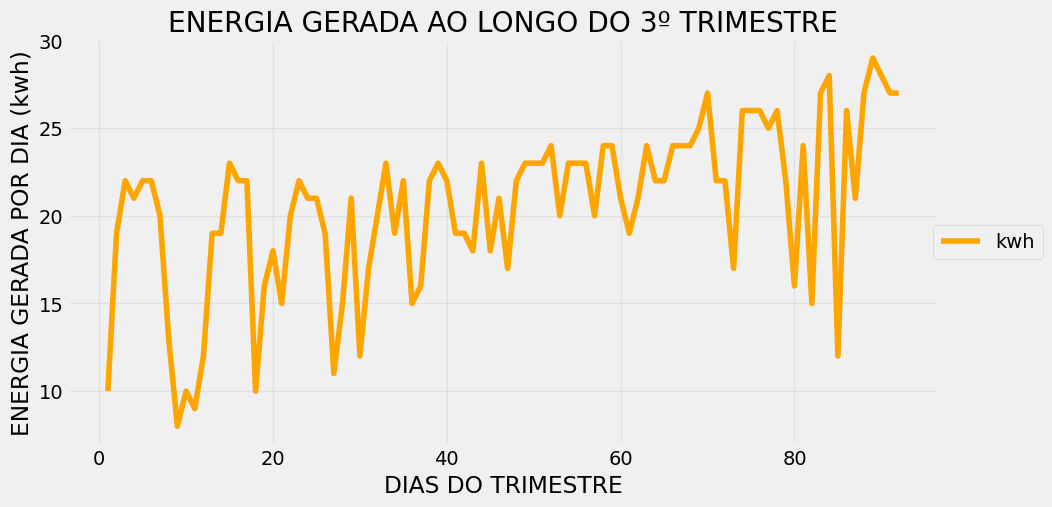

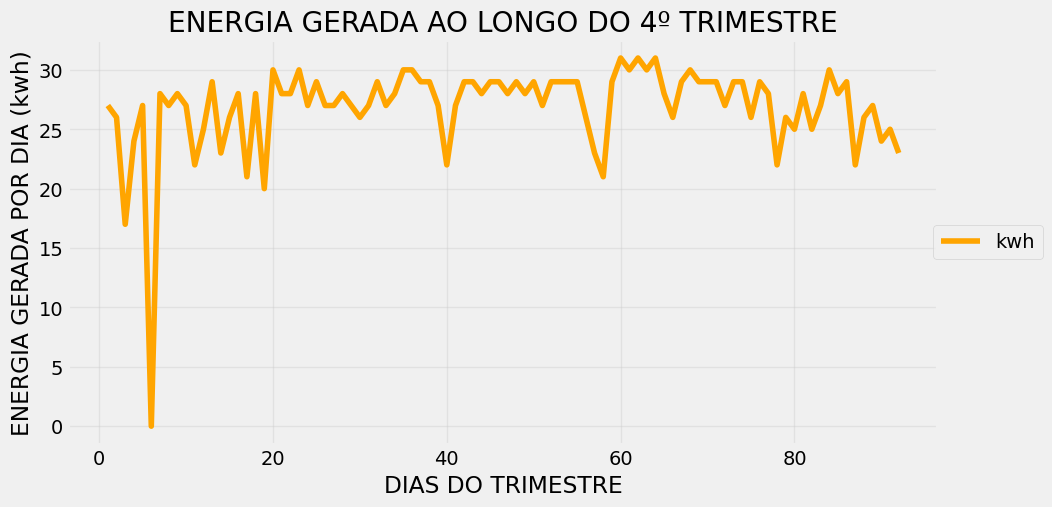

In [21]:
# Gráfico de linha
for num_trimestre in range(1, 5):
    trimestre = usina_solar[usina_solar['trimestre'] == f'{num_trimestre}º TRI']
    dias_trimestre = [data.strftime('%Y-%m-%d') for data in trimestre['dia'].tolist()]
    kwhs_trimestre = trimestre['energiaDia'].tolist()
    dados_usina_trimestre = [(dias_trimestre[indice], kwhs_trimestre[indice]) for indice, dia in enumerate(dias_trimestre)]

    titulo = f'ENERGIA GERADA AO LONGO DO {num_trimestre}º TRIMESTRE'
    xlabell = 'DIAS DO TRIMESTRE'

    apresentar_grafico_linha(dados_usina_trimestre, titulo, xlabell)

    print('\n')


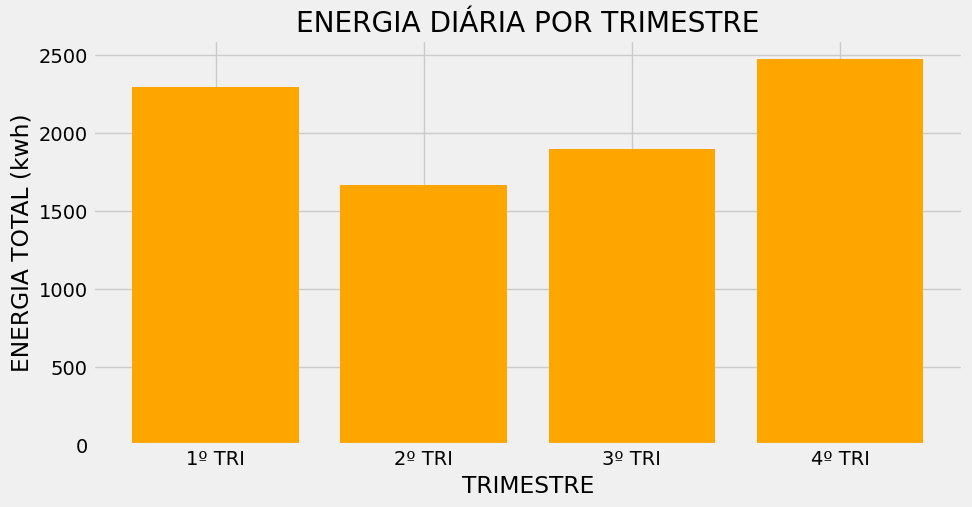

In [22]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(nomes_trimestres, dados_agrupados_trimestre, color='orange')
plt.xlabel('TRIMESTRE')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR TRIMESTRE')
plt.show()


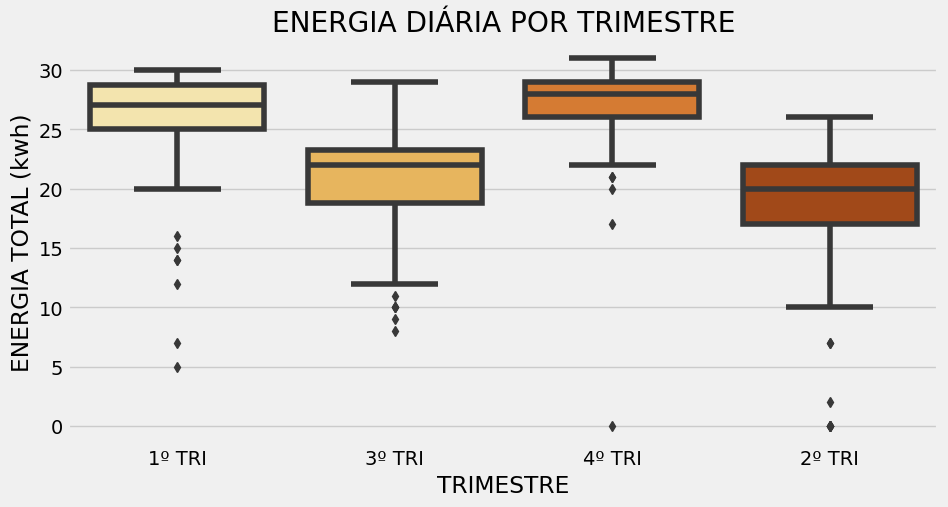

In [23]:
# Gráfico de boxplot
cores = sns.color_palette("YlOrBr", n_colors=len(nomes_trimestres))
plt.figure(figsize=(10, 5))
sns.boxplot(x='trimestre', y='energiaDia', data=usina_solar, palette=cores)
plt.xlabel('TRIMESTRE')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR TRIMESTRE')
plt.show()


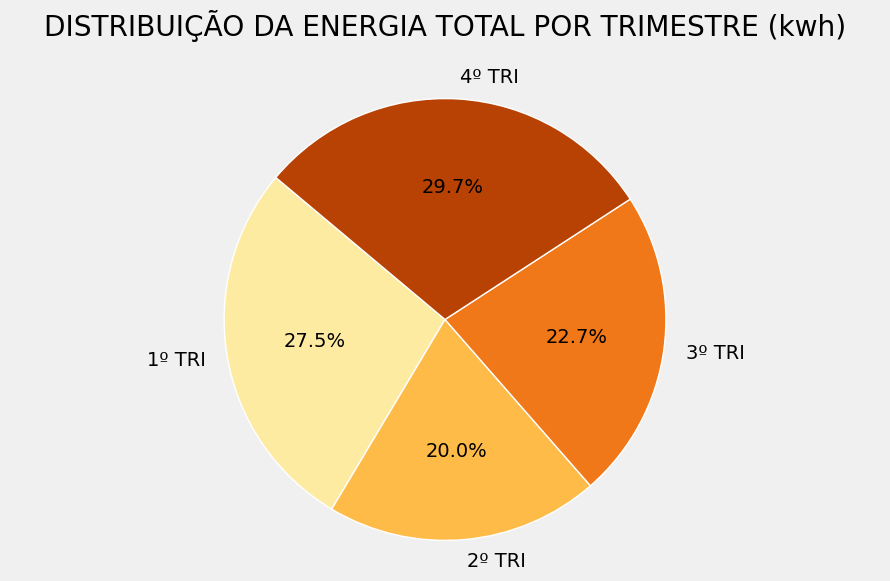

In [24]:
# Gráfico de pizza
cores = sns.color_palette('YlOrBr', n_colors=len(nomes_trimestres))
plt.figure(figsize=(10, 6))
plt.pie(dados_agrupados_trimestre, labels=nomes_trimestres, autopct='%1.1f%%', startangle=140,
        colors=cores, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('DISTRIBUIÇÃO DA ENERGIA TOTAL POR TRIMESTRE (kwh)\n')
plt.axis('equal')
plt.show()


In [25]:
dados_agrupados_trimestre.sort_values()


trimestre
2º TRI    1665
3º TRI    1892
1º TRI    2292
4º TRI    2473
Name: energiaDia, dtype: int64

Uma análise dos gráficos trimestrais revela claramente que o 4º trimestre registrou uma produção de energia substancialmente superior. Essa tendência pode ser atribuída à maior presença de sol e menor cobertura de nuvens durante o 4º trimestre, que coincide em grande parte com a temporada de primavera e uma pequena parte do verão.

* Energia gerada semestral

In [26]:
# Cria uma função para atribuir valores aos semestres
def definir_semestre(row):
    if row['trimestre'] in ['1º TRI', '2º TRI']:
        return 1
    elif row['trimestre'] in ['3º TRI', '4º TRI']:
        return 2
    else:
        return None  # Lida com valores de 'trimestre' que não correspondem a nenhum dos casos


# Adiciona a coluna 'semestre' com base na função definir_semestre
usina_solar['semestre'] = usina_solar.apply(definir_semestre, axis=1)

# Agrupa os dados por semestre e soma a energia diária
dados_agrupados_semestre = usina_solar.groupby('semestre')['energiaDia'].sum()


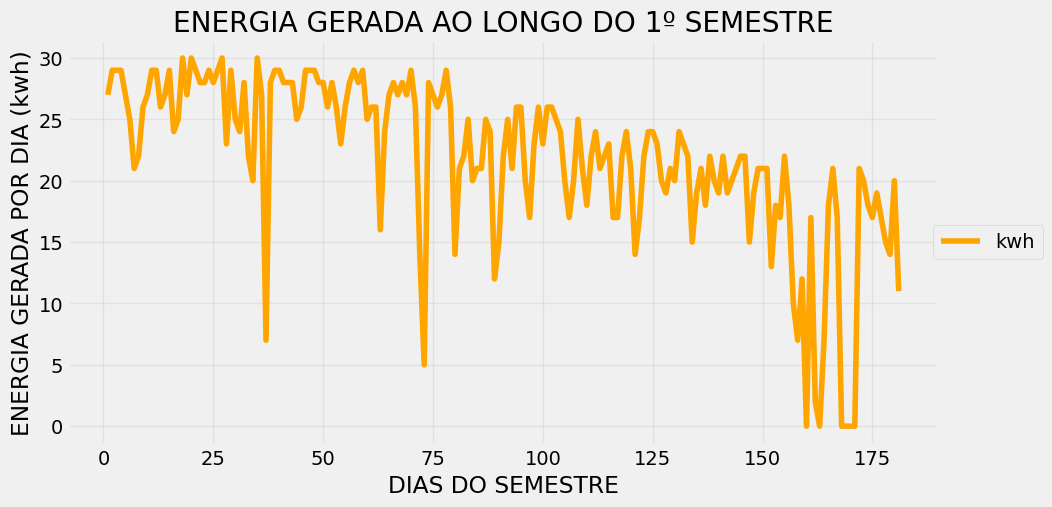

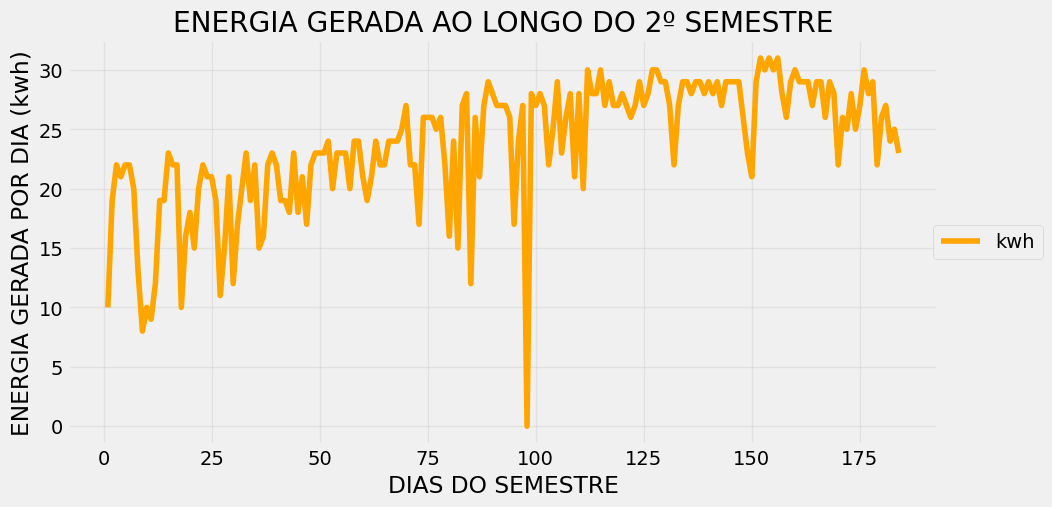

In [27]:
# Gráfico de linha
for num_semestre in range(1, 3):
    semestre = usina_solar[usina_solar['semestre'] == num_semestre]
    dias_semestre = [data.strftime('%Y-%m-%d') for data in semestre['dia'].tolist()]
    kwhs_semestre = semestre['energiaDia'].tolist()
    dados_usina_semestre = [(dias_semestre[indice], kwhs_semestre[indice]) for indice, dia in enumerate(dias_semestre)]

    titulo = f'ENERGIA GERADA AO LONGO DO {num_semestre}º SEMESTRE'
    xlabell = 'DIAS DO SEMESTRE'

    apresentar_grafico_linha(dados_usina_semestre, titulo, xlabell)

    print('\n')


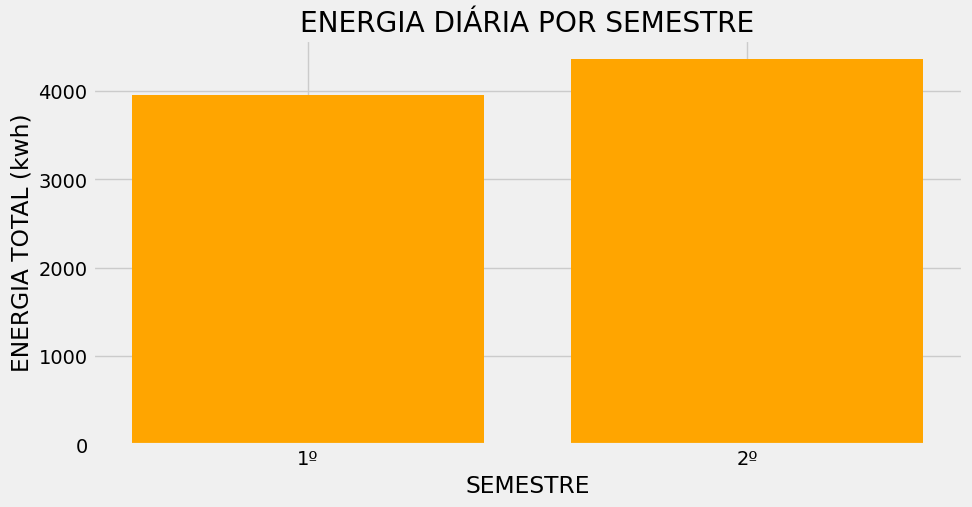

In [28]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(['1º', '2º'], dados_agrupados_semestre, color='orange')
plt.xlabel('SEMESTRE')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR SEMESTRE')
plt.show()


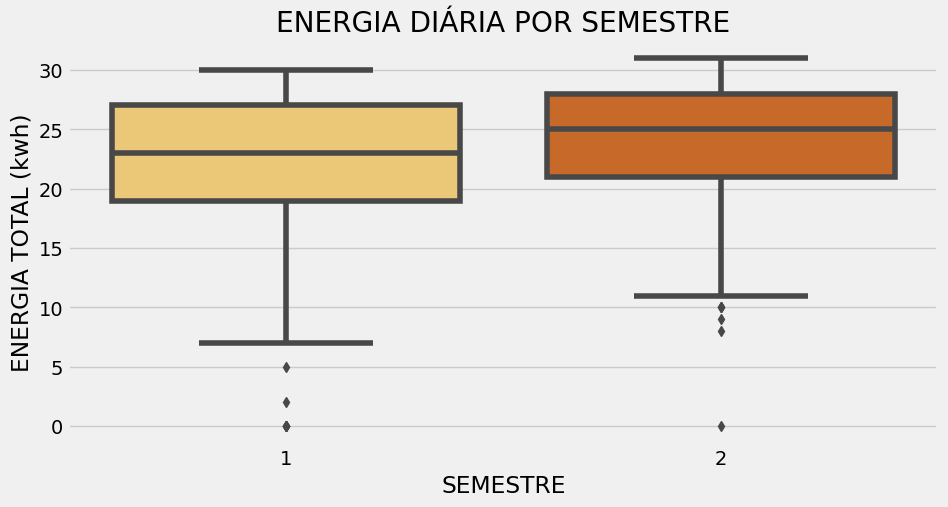

In [29]:
# Gráfico de boxplot
cores = sns.color_palette("YlOrBr", n_colors=2)
plt.figure(figsize=(10, 5))
sns.boxplot(x='semestre', y='energiaDia', data=usina_solar, palette=cores)
plt.xlabel('SEMESTRE')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR SEMESTRE')
plt.show()


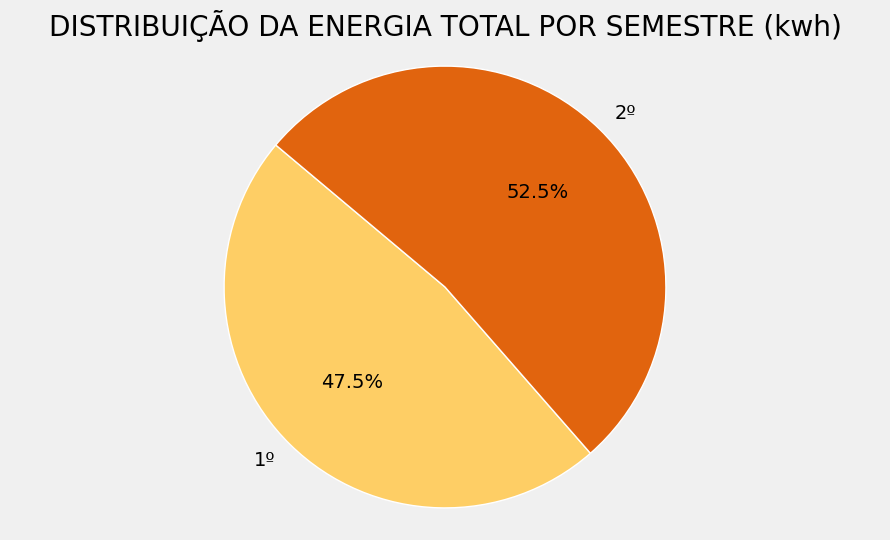

In [30]:
# Gráfico de pizza
cores = sns.color_palette('YlOrBr', n_colors=2)
plt.figure(figsize=(10, 6))
plt.pie(dados_agrupados_semestre, labels=['1º', '2º'], autopct='%1.1f%%', startangle=140,
        colors=cores, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('DISTRIBUIÇÃO DA ENERGIA TOTAL POR SEMESTRE (kwh)')
plt.axis('equal')
plt.show()


In [31]:
dados_agrupados_semestre.sort_values()


semestre
1    3957
2    4365
Name: energiaDia, dtype: int64

Uma análise dos gráficos semestrais demonstra de forma evidente que o 2º semestre apresentou uma produção de energia significativamente mais alta. Essa tendência pode ser explicada pela maior incidência de luz solar e pela diminuição da cobertura de nuvens durante o 2º semestre, o que, em grande parte, coincide com uma temporada de seca.

* Energia gerada por estação

In [32]:
# Todas as funções e configurações foram com base no Hemisfério Sul
def datas_primavera(data):
    inicio_primavera = date(data.year, 9, 22)
    fim_primavera = date(data.year, 12, 20)
    data_atual = inicio_primavera

    datas = []

    while data_atual <= fim_primavera:
        datas.append(data_atual)
        data_atual += timedelta(days=1)

    return datas


def datas_outono(data):
    inicio_outono = date(data.year, 3, 20)
    fim_outono = date(data.year, 6, 20)
    data_atual = inicio_outono

    datas = []

    while data_atual <= fim_outono:
        datas.append(data_atual)
        data_atual += timedelta(days=1)

    return datas


def datas_inverno(data):
    inicio_inverno = date(data.year, 6, 21)
    fim_inverno = date(data.year, 9, 21)
    data_atual = inicio_inverno

    datas = []

    while data_atual <= fim_inverno:
        datas.append(data_atual)
        data_atual += timedelta(days=1)

    return datas


def obter_estacao(data):
    if data in datas_primavera(data):
        return 'Primavera'
    elif data in datas_inverno(data):
        return 'Inverno'
    elif data in datas_outono(data):
        return 'Outono'
    else:
        return 'Verão'


In [33]:
# Adiciona a coluna 'estacao' com base na função obter_estacao
usina_solar['estacao'] = usina_solar['dia'].apply(obter_estacao)

# Agrupa os dados por estação e soma a energia diária
dados_agrupados_estacao = usina_solar.groupby('estacao')['energiaDia'].sum()

nomes_estacoes = ['Inverno', 'Outono', 'Primavera', 'Verão']


<ipython-input-32-1f970eddf06c>:45: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if data in datas_primavera(data):
<ipython-input-32-1f970eddf06c>:47: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  elif data in datas_inverno(data):
<ipython-input-32-1f970eddf06c>:49: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  elif data in datas_outono(data):


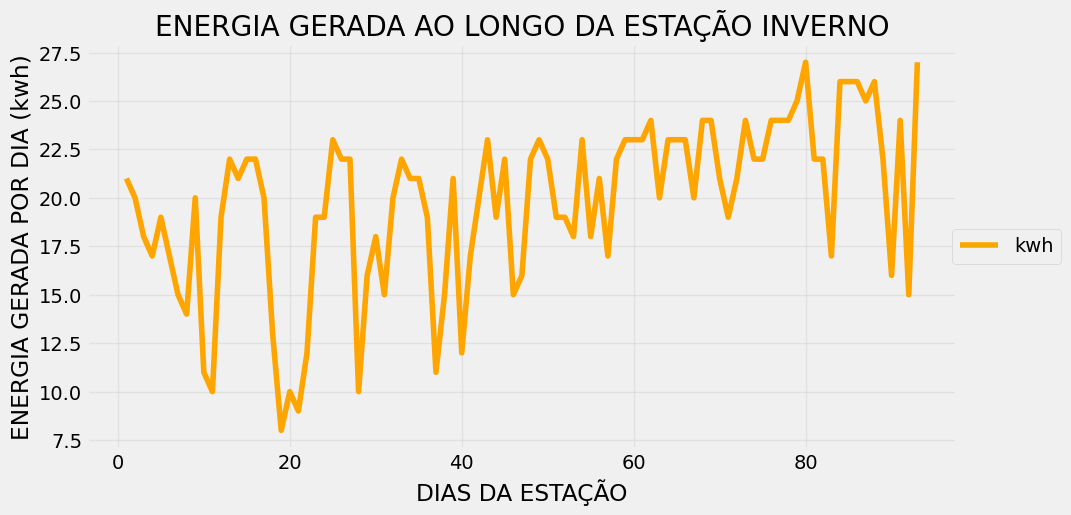

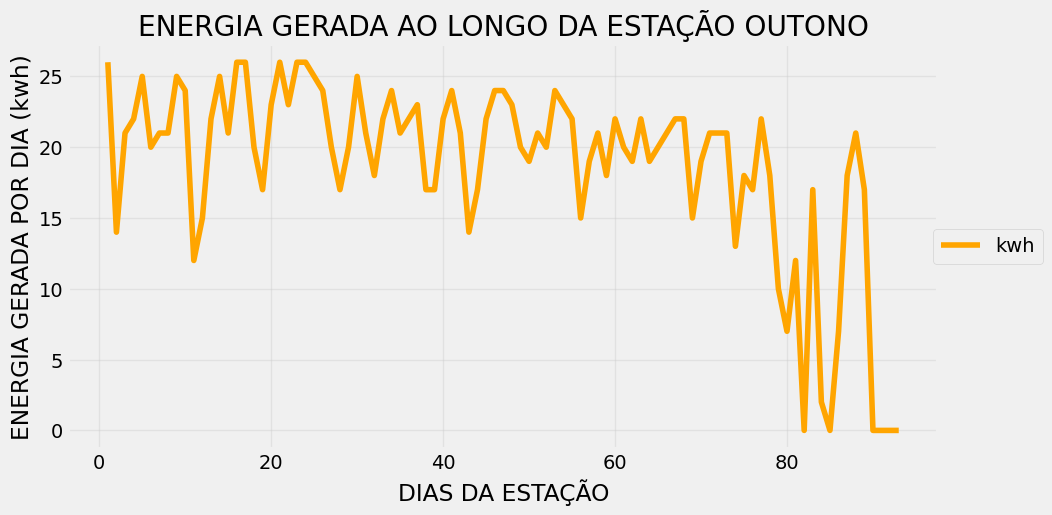

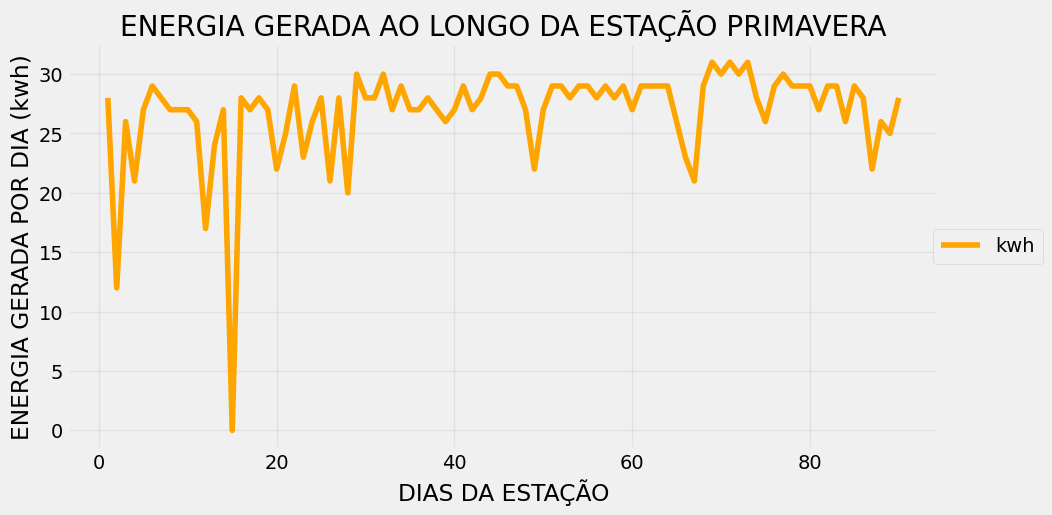

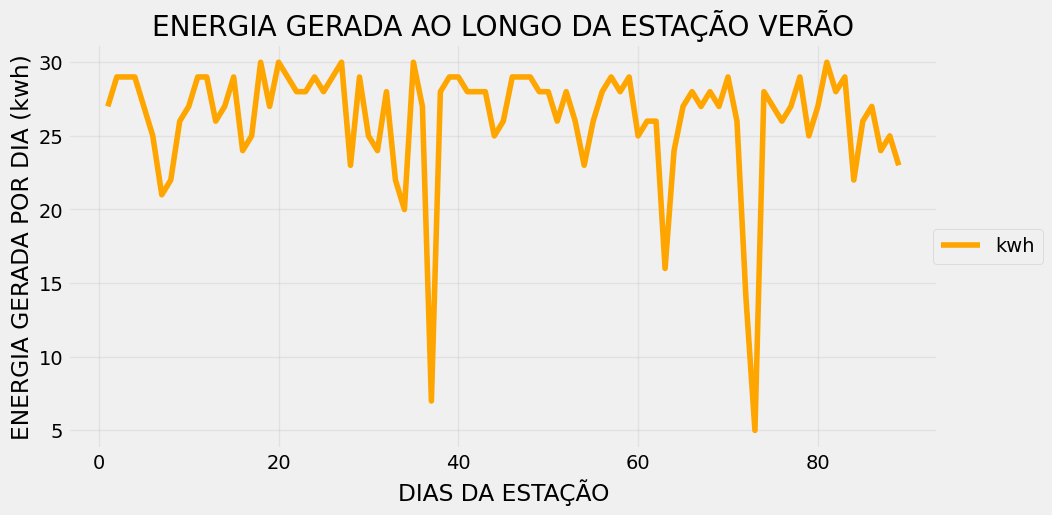

In [34]:
# Gráfico de linha
for estacao in nomes_estacoes:
    estacaoo = usina_solar[usina_solar['estacao'] == estacao]
    dias_estacao = [data.strftime('%Y-%m-%d') for data in estacaoo['dia'].tolist()]
    kwhs_estacao = estacaoo['energiaDia'].tolist()
    dados_usina_estacao = [(dias_estacao[indice], kwhs_estacao[indice]) for indice, dia in enumerate(dias_estacao)]

    titulo = f'ENERGIA GERADA AO LONGO DA ESTAÇÃO {estacao.upper()}'
    xlabell = 'DIAS DA ESTAÇÃO'

    apresentar_grafico_linha(dados_usina_estacao, titulo, xlabell)

    print('\n')


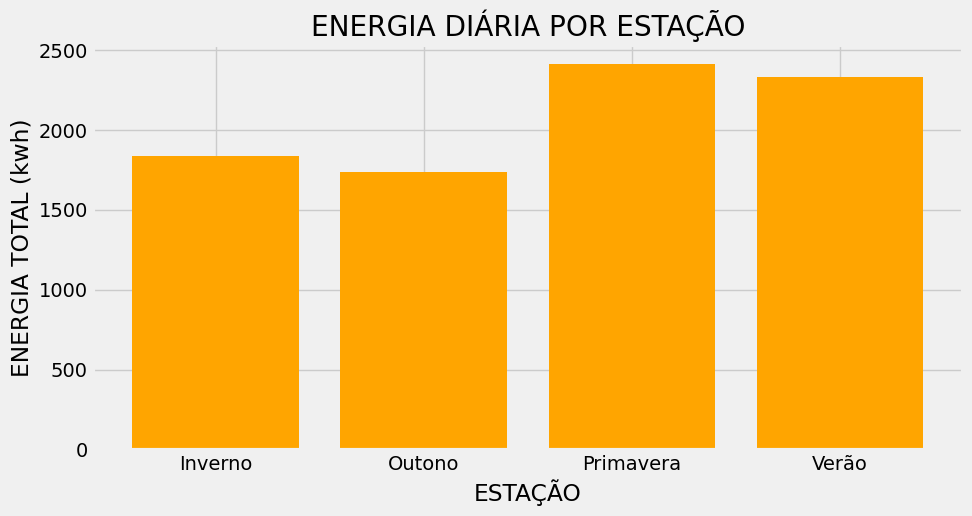

In [35]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(nomes_estacoes, dados_agrupados_estacao, color='orange')
plt.xlabel('ESTAÇÃO')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR ESTAÇÃO')
plt.show()


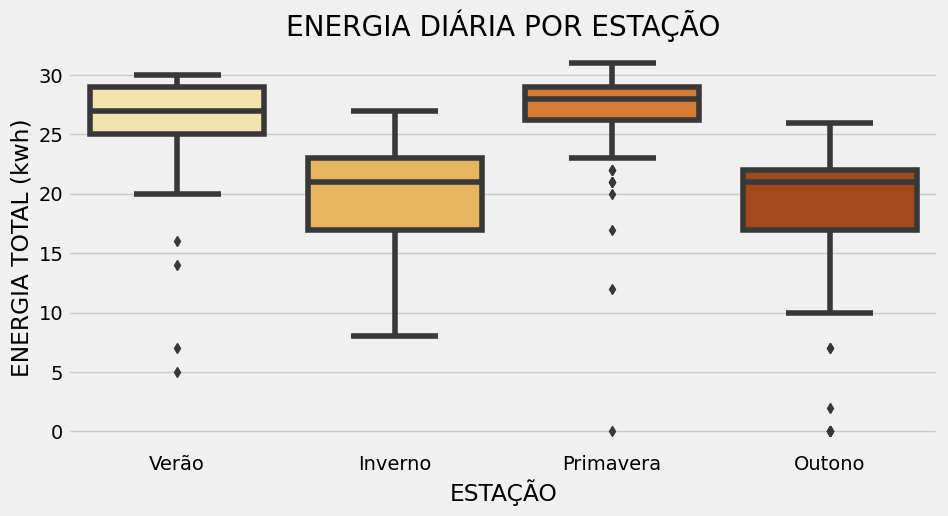

In [36]:
# Gráfico de boxplot
cores = sns.color_palette("YlOrBr", n_colors=4)
plt.figure(figsize=(10, 5))
sns.boxplot(x='estacao', y='energiaDia', data=usina_solar, palette=cores)
plt.xlabel('ESTAÇÃO')
plt.ylabel('ENERGIA TOTAL (kwh)')
plt.title('ENERGIA DIÁRIA POR ESTAÇÃO')
plt.show()


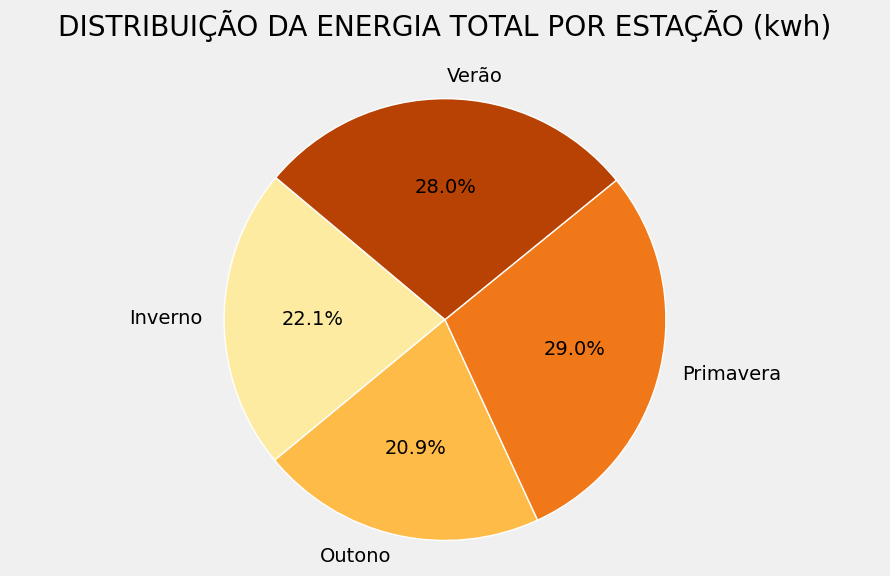

In [37]:
# Gráfico de pizza
cores = sns.color_palette('YlOrBr', n_colors=4)
plt.figure(figsize=(10, 6))
plt.pie(dados_agrupados_estacao, labels=nomes_estacoes, autopct='%1.1f%%', startangle=140,
        colors=cores, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title('DISTRIBUIÇÃO DA ENERGIA TOTAL POR ESTAÇÃO (kwh)\n')
plt.axis('equal')
plt.show()


In [38]:
dados_agrupados_estacao.sort_values()


estacao
Outono       1739
Inverno      1839
Verão        2332
Primavera    2412
Name: energiaDia, dtype: int64

Uma análise dos gráficos das estações revela claramente que a primavera apresentou uma produção de energia significativamente maior. Essa tendência pode ser explicada pela maior exposição à luz solar e pela redução da cobertura de nuvens durante a estação, o que, em grande parte, coincide com uma temporada de seca. Além disso, muitos associam o verão a poucas nuvens, no entanto, essa estação tem altas incidências de tempestades, o que resulta em céu bastante nublado no final de dezembro e em parte de janeiro.

# Conclusão

Com base nas análises dos gráficos anuais, trimestrais, semestrais e sazonais da usina solar, é possível chegar a várias conclusões e identificar soluções para aumentar a produção de energia em épocas de baixa geração:

1. Armazenamento de energia: Dada a sazonalidade da produção de energia solar, é fundamental investir em sistemas de armazenamento de energia, como baterias, para capturar o excesso de energia produzido durante os meses de alta geração (como dezembro) e liberá-lo durante os meses de baixa geração (como junho).

2. Diversificação de fontes de energia: Além da energia solar, a usina pode considerar a incorporação de outras fontes de energia, como eólica, para garantir um fornecimento mais consistente de eletricidade ao longo do ano.

3. Melhor previsão meteorológica: A usina deve investir em tecnologia avançada para prever com maior precisão as condições meteorológicas, especialmente durante a estação de verão e inverno, quando a geração de energia é mais variável devido a tempestades e nuvens.

4. Manutenção e limpeza regular: A manutenção adequada dos painéis solares e a limpeza regular ajudarão a maximizar a absorção de luz solar, especialmente durante os meses de inverno, quando a exposição ao sol é limitada.

5. Monitoramento e ajuste contínuo: A usina deve implementar sistemas de monitoramento em tempo real para ajustar a inclinação dos painéis solares e otimizar sua orientação em direção ao sol, maximizando assim a eficiência da geração de energia.

6. Redução de perdas de transmissão: Para minimizar as perdas de energia durante a transmissão, a usina pode investir em sistemas de distribuição de energia mais eficientes e na melhoria da infraestrutura de transmissão.

7. Planejamento estratégico: A usina deve criar um plano estratégico que leve em consideração as variações sazonais na geração de energia, a demanda dos consumidores e as metas de produção de energia a longo prazo.

Essas soluções podem ajudar a usina solar a superar os desafios de baixa geração de energia em épocas de baixa luz solar e melhorar sua eficiência ao longo do ano.